# Programming Assignment #1 
In the required part of this programming assignment, we are going to plot some CT and DT signals. As it was mentioned in the PDF, this part has **20** scores.

In the optional part, we are going to determine the properties of a mysterious system!! This part has **7** bonus scores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Signal plotting
In this section, we learn how to plot signals by some examples to become familiar with some basic functions of **NumPy** and **Matplotlib**.

To define a signal using NumPy, you need to create two arrays: $t$ and $x(t)$ in continuous-time case or $n$ and $x[n]$ in discrete-time case.
For plotting the signals, we defined plot_ct_signal (for continuous-time signals) and plot_dt_signal (for discrete-time signals). You have to write the body of these functions:

* plot_ct_signal(t, x_t)
* plot_dt_signal(n, x_n)


For example, to plot the following signals:

* Continuous-Time: $ x(t)\:=\:sin(t)\:\:;\:\:\:step\:=\:0.01\:\:;\:\:interval\:=\:[-3\pi \:,\:3\pi] $
* Discrete-Time: $ x[n]\:=\:sin(n)\:\:;\:\:interval\:=\:[-10 \:,\:10] $

We can use:
```
t = np.arange(-3 * np.pi, 3 * np.pi, step=0.01)
x_t = np.sin(t)
plot_ct_signal(t=t, x_t=x_t)
```
Which results in:

<img src="https://www.uplooder.net/img/image/27/70b50eb424d5136b325d4e29953b76ff/CT-Sinusoid.png" width="80%" />


Or for DT:
```
n = np.arange(-10, 10, step=1)
x_n = np.sin(n)
plot_dt_signal(n=n, x_n=x_n)
```

Which results in:

<img src="https://www.uplooder.net/img/image/95/1677650e4029e8ab6aefda4e2e98d52f/DT-Sinusoid.png" width="80%" />

### 1.a) Complete the following functions.

In [2]:
def plot_ct_signal(t, x_t):
    plt.plot(t, x_t)
    plt.grid(linewidth=2.5)
    plt.show()

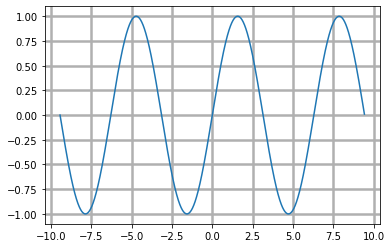

In [3]:
t = np.arange(-3 * np.pi, 3 * np.pi, step=0.01)
x_t = np.sin(t)
plot_ct_signal(t=t, x_t=x_t)

In [4]:
def plot_dt_signal(n, x_n):
    plt.stem(n, x_n)
    plt.grid(linewidth=2.5)
    plt.show()

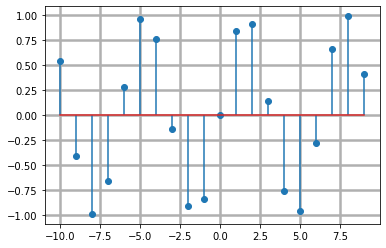

In [5]:
n = np.arange(-10, 10, step=1)
x_n = np.sin(n)
plot_dt_signal(n=n, x_n=x_n)

### 1.b) Now plot the following signals.

#### Continuous-Time signals:

1. $x_1(t)\:=\:e^{0.5t}u(-t+4)\:\:;\:\:step\:=\:0.01\:\:;\:\:\:interval\:=\:[-10,\:10]$

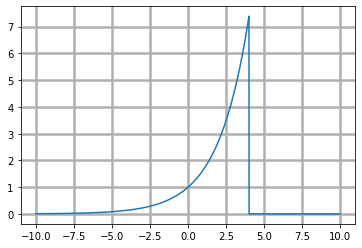

In [6]:
t = np.arange(-10, 10, step=0.01)
unit_step = [1 if _t < 4 else 0 for _t in t]
x_t = np.exp(0.5 * t)*unit_step
plot_ct_signal(t, x_t)

2. $x(t) = \begin{cases}-1 & t < -1\\t & -1 \leq t \leq 1\\cos(t-1) & t > 1\end{cases}\:\:\:\:\:;\:\:step\:=\:0.01\:\:;\:\:interval\:=\:[-4,\:4]$

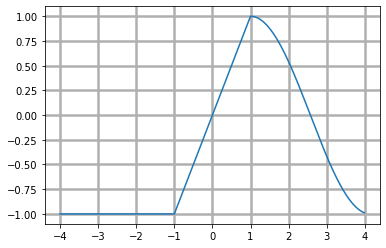

In [7]:
t = np.arange(-4, 4, step=0.01)
output_signal = lambda t : (t < 1 and (t < -1 and -1 or t) or np.cos(t-1))
x_t = [output_signal(_t) for _t in t]
plot_ct_signal(t, x_t)

3. $x_3(t)\:=\:\sum _{n=-20}^{20}\:e^{-|2t+n|}\:\:;\:\:step\:=\:0.01\:\:;\:\:interval\:=\:[-5 \:,\:5]$

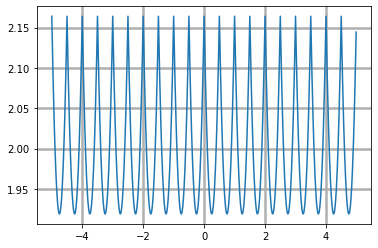

In [8]:
t = np.arange(-5, 5, step=0.01)
x_t = [sum([np.exp(-1*np.abs(2*_t + n)) for n in range(-20, 21)]) for _t in t]
plot_ct_signal(t, x_t)

#### Discrete-Time signals:

1. $x_1[n] = sin(2.3\pi n) + cos(4.3\pi n)\:\:;\:\:interval\:=\:[-20,\:20]$

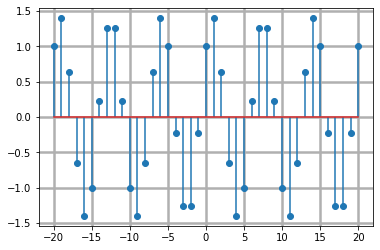

In [9]:
n = np.arange(-20, 21, step=1)
x_n = np.sin(2.3 * np.pi * n) + np.cos(4.3 * np.pi * n)
plot_dt_signal(n, x_n)

2. $x_2[n] = sin(4.3\pi n) + cos(6.3\pi n)\:\:;\:\:interval\:=\:[-20,\:20]$

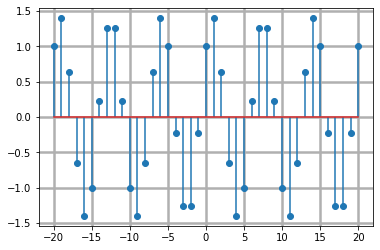

In [10]:
n = np.arange(-20, 21, step=1)
x_n = np.sin(4.3 * np.pi * n) + np.cos(6.3 * np.pi * n)
plot_dt_signal(n, x_n)

3. $x_3[n] = u[n-3] - u[-n+3] + 2\delta[n] \:\:;\:\:interval\:=\:[-10,\:10]$

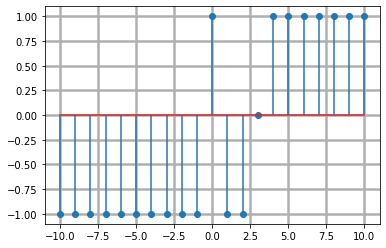

In [11]:
n = np.arange(-10, 11, 1)
unit_step = lambda _n, n_0 : _n >= n_0 and 1 or 0
unit_pulse = lambda _n, n_0 : _n == n_0
x_n = [unit_step(_n, 3) - unit_step(-1*_n, -3) + 2*unit_pulse(_n, 0) for _n in n]
plot_dt_signal(n, x_n)

## System properties (Optional)
One objective of Signals and Systems course is analyzing systems behavior. Most of the time, there is no explicit equation for the system. As we continue in this course, you will see that LTI systems play an important role in signals and systems analysis.

So here we try to guess the **linearity and time-invariant** properties of an unknown discrete-time system. By giving appropriate inputs to the system, you can have a good guess.

To get system's output, create two arrays, $n$ and $x[n]$, like those we created in the first part. Then input these arrays to the provided function, `get_system_output`, to get the system's output. You can plot the output to analyze it. Repeat this with different signals to determine the two properties. (Note that you need an internet connection to get the output)

For instance, consider this input:
```
n = np.arange(-10, 10, step=1)
x_n = np.sin(n)
n1, y_n1 = get_system_output(n, x_n)
plot_dt_signal(n=n1, x_n=y_n1)
```

<img src="https://www.uplooder.net/img/image/66/2024348e0ced99a0c6f401598073edd0/Mysterious.png" width="80%" />

Find out the properties of this mysterious (!) system and explain why do you think they are the case.

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


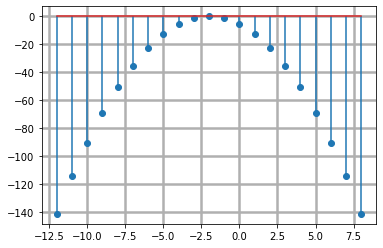

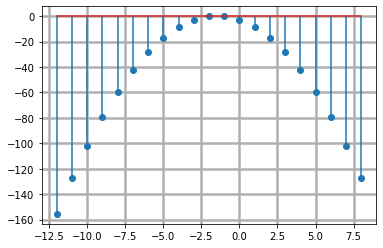

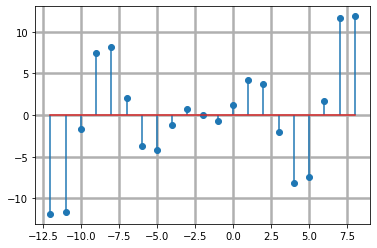

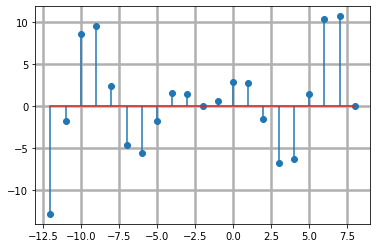

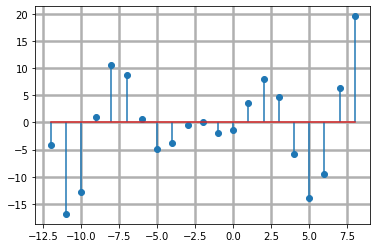

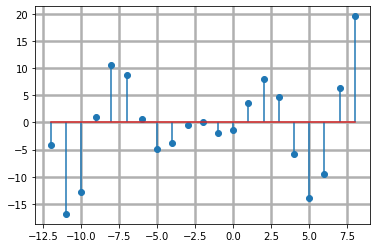

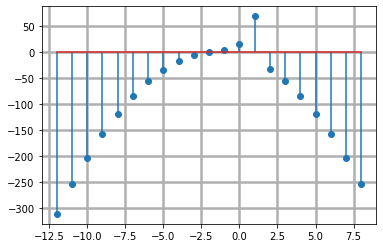

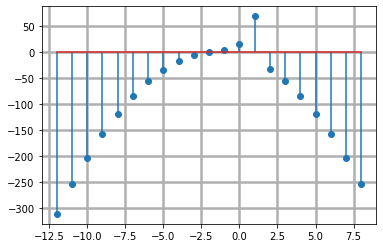

In [12]:
!pip install requests
from system import get_system_output

n = np.arange(-10, 11, step=1)

'''
X1[n] = n
'''
x_n1 = n
n1, y_n1 = get_system_output(n, x_n1)
plot_dt_signal(n1, y_n1)

'''
Right shifted the input signal by 1
X2[n] = X1[n-1] = n-1
'''
x_n2 = n-1
n2, y_n2 = get_system_output(n, x_n2)
plot_dt_signal(n2, y_n2)



'''
X1[n] = Cos(n)
'''
x_n3 = np.cos(n)
n3, y_n3 = get_system_output(n, x_n3)
plot_dt_signal(n3, y_n3)

'''
Left shifted the input signal by 1
X2[n] = X1[n+1] = Cos(n+1)
'''
x_n4 = np.cos(n+1)
n4, y_n4 = get_system_output(n, x_n4)
plot_dt_signal(n4, y_n4)



'''
X1[n] = Sin[n]
X2[n] = Cos[n]
X3[n] = X1[n] + X2[n] = Sin[n] + Cos[n]
'''
x_n1 = np.sin(n)
x_n2 = np.cos(n)
x_n3 = x_n1 + x_n2
n1, y_n1 = get_system_output(n, x_n1)
n2, y_n2 = get_system_output(n, x_n2)
n3, y_n3 = get_system_output(n, x_n3)

plot_dt_signal(n3, y_n3)
plot_dt_signal(n3, y_n1+y_n2)


'''
X1[n] = n-1
X2[n] = U[-n+4] * e^[n]
X3[n] = 2*X1[n] - X2[n] = 2n - U[-n+4] * e^[n] - 1
'''
x_n1 = n-1
x_n2 = np.array([1 if _n < 4 else 0 for _n in n]) * np.exp(n)
x_n3 = 2*x_n1 - x_n2
n1, y_n1 = get_system_output(n, x_n1)
n2, y_n2 = get_system_output(n, x_n2)
n3, y_n3 = get_system_output(n, x_n3)

plot_dt_signal(n3, y_n3)
plot_dt_signal(n3, 2*y_n1 - y_n2)


